# <h1 style="font-family: Times New Roman ; border-radius : 10px;padding: 20px; font-size: 40px; color: #DF6589; text-align: center; line-height: 0.55;background-color: #3C1053"><b>Stroke Prediction</b><br></h1>

<center>
    <img src="https://www.cdc.gov/stroke/images/Index-About.jpg?_=67208" alt="Stroke Prediction" width="50%">
</center>

### Problem Statement :

According to the World Health Organization (WHO), stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. It is another health issue that has found to be rising throughout the world due to the adoption of lifestyle changes that disregards healthy lifestyle & good eating habits. Thus, new emerging electronic devices that record the health vitals have paved the way for creating an automated solution with AI techniques at it's core. Thus, similar to heart diseases, efforts have begun to create lab tests that predict stroke. The dataset presented here has many factors that highlight the lifestyle of the patients and hence gives us an opportunity to create an AI-based solution for it.

### Aim :
- To classify / predict whether a patient can suffer a stroke.
- It is a **binary classification** problem with multiple numerical and categorical features.

### Dataset Attributes :
    
- **id** : unique identifier
- **gender** : "Male", "Female" or "Other"
- **age** : age of the patient
- **hypertension**: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- **heart_disease** : 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- **ever_married** : "No" or "Yes"
- **work_type** : "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- **Residence_type** : "Rural" or "Urban"
- **avg_glucose_level** : average glucose level in blood
- **bmi** : body mass index
- **smoking_status** : "formerly smoked", "never smoked", "smokes" or "Unknown"*
- **stroke** : 1 if the patient had a stroke or 0 if not

### Notebook Contents :
- Dataset Information
- Exploratory Data Analysis (EDA)
- Summary of EDA & Comparison with Domain Information
- Feature Engineering (Data Leakage & Data Balancing)
- Modeling
- Conclusion

### What you will learn :
- Data Visualization
- Data Balancing using SMOTE
- Data Leakage
- Statistical Tests for Feature Selection
- Modeling and visualization of results for algorithms

### Lets get started!

# <center><div style="font-family: Times New Roman; border-radius : 10px; background-color: #3C1053; color: #DF6589; padding: 12px; line-height: 1;">Dataset Information</div></center>

### Import the Necessary Libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
from tqdm import tqdm
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.00,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.00,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,60182,Female,49.00,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,1665,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1


### Data Info :

In [3]:
data.shape

(5110, 12)

In [3]:
data.columns1

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [7]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


<AxesSubplot:>

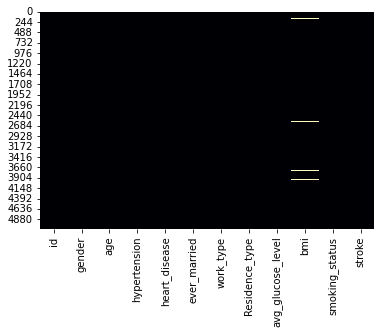

In [6]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False)

- **A few null values** are present in the **bmi** feature!

In [8]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.00,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.10,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.30,0.23,45.28,7.85,0.22
min,67.00,0.08,0.00,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.00,0.00,77.25,23.50,0.00
50%,36932.00,45.00,0.00,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.00,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.00,1.00,271.74,97.60,1.00


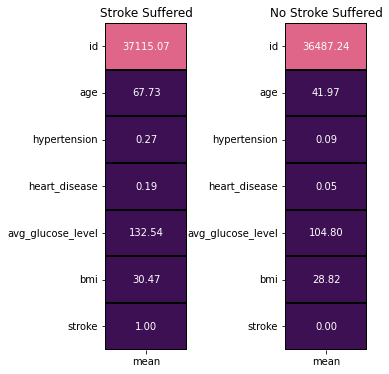

In [8]:
stroke = data[data['stroke'] == 1].describe().T
no_stroke = data[data['stroke'] == 0].describe().T

colors = ['#3C1053','#DF6589']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(stroke[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Stroke Suffered');

plt.subplot(1,2,2)
sns.heatmap(no_stroke[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Stroke Suffered');

fig.tight_layout(pad = 0)

- **Mean** values of all the features for cases of **stroke suffered** and **no stroke suffered**.
- **age** and **avg_glucose_level** can be solid 1st hand indicators to identify a stroke.
- Mean **age** values of patients that suffered a stroke, **67.73**,is much higher than those did not suffer a stroke, **41.97**.
- Similarly, **avg_glucose_level** value of **132.54** can indicate a higher chance of suffering from stroke than the **avg_glucose_level** value of **104.80** that has been found in patients that did not suffer a stroke.

### Fill Missing Values :

In [9]:
l1 = [i for i in tqdm(range(len(data.isnull()['bmi']))) if data.isnull().loc[i,'bmi'] == True]
print('Total Number of Missing Values in bmi feature :', len(l1))

100%|█████████████████████████████████████████████████████████████████████████████| 5110/5110 [00:31<00:00, 161.72it/s]

Total Number of Missing Values in bmi feature : 201


- From the table of descriptive statistics, we observe that mean and median values of **bmi** are very close to each other.
- Hence, we will fill the missing values with the **mean values**.

<AxesSubplot:>

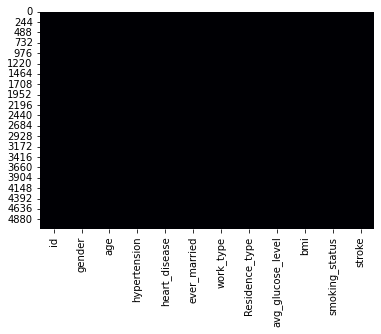

In [11]:
data['bmi'].fillna(data['bmi'].mean(),inplace = True)
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False)

# <center><div style="font-family: Times New Roman; border-radius : 10px; background-color: #3C1053; color: #DF6589; padding: 12px; line-height: 1;">Exploratory Data Analysis</div></center>

### Dividing features into Discrete and Categorical :

In [12]:
data.drop(columns = ['id'],inplace = True)
col = list(data.columns)
categorical_features = []
discrete_features = []
for i in col:
    if len(data[i].unique()) > 6:
        discrete_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Discrete Features :',*discrete_features)

data['age'] = data['age'].astype(int)
df1 = data.copy(deep = True)

Categorical Features : gender hypertension heart_disease ever_married work_type Residence_type smoking_status stroke
Discrete Features : age avg_glucose_level bmi


-  We drop the **id** column as it is just a unique identifier.
- Here, categorical features are defined if the the attribute has less than 6 unique elements else it is a discrete feature.
- Typical approach for this division of features can also be based on the datatypes of the elements of the respective attribute.

**Eg :** datatype = integer, attribute = discrete feature ; datatype = string, attribute = categorical feature

- Creating a deep copy of the orginal dataset for experimenting with data, visualization and modeling.
- Modifications in the original dataset will not be highlighted in this deep copy.
- We now Label Encode the data categorical text data features. 

In [13]:
le = LabelEncoder()
text_data_features = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
l3 = []; l4 = [];
print('Label Encoder Transformation')
for i in tqdm(text_data_features):
    df1[i] = le.fit_transform(df1[i])
    l3.append(list(df1[i].unique())); l4.append(list(le.inverse_transform(df1[i].unique())))
    print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

Label Encoder Transformation


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 185.10it/s]

gender  :  [1 0 2]  =  ['Male' 'Female' 'Other']
ever_married  :  [1 0]  =  ['Yes' 'No']
work_type  :  [2 3 0 4 1]  =  ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type  :  [1 0]  =  ['Urban' 'Rural']
smoking_status  :  [1 2 3 0]  =  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


- We store the label encoded transformations inside a dictionary that gives us the information about the encoded value and it's original value! 
- We add the remaining 2 features manually i.e **heart_disease** & **hypertension**!

In [14]:
tf1 = {}
for i in range(len(text_data_features)):
    tf1[text_data_features[i]] = {}
    for j,k in zip(l3[i],l4[i]):
        tf1[text_data_features[i]][j] = k

tf1['hypertension'] = {0 : 'No Hypertension', 1 : 'Hypertension'} 
tf1['heart_disease'] = {0 : 'No Heart Disease', 1 : 'Heart Disease'}
tf1

{'gender': {1: 'Male', 0: 'Female', 2: 'Other'},
 'ever_married': {1: 'Yes', 0: 'No'},
 'work_type': {2: 'Private',
  3: 'Self-employed',
  0: 'Govt_job',
  4: 'children',
  1: 'Never_worked'},
 'Residence_type': {1: 'Urban', 0: 'Rural'},
 'smoking_status': {1: 'formerly smoked',
  2: 'never smoked',
  3: 'smokes',
  0: 'Unknown'},
 'hypertension': {0: 'No Hypertension', 1: 'Hypertension'},
 'heart_disease': {0: 'No Heart Disease', 1: 'Heart Disease'}}

### Target Variable Visualization (stroke) : 

NameError: name 'colors' is not defined

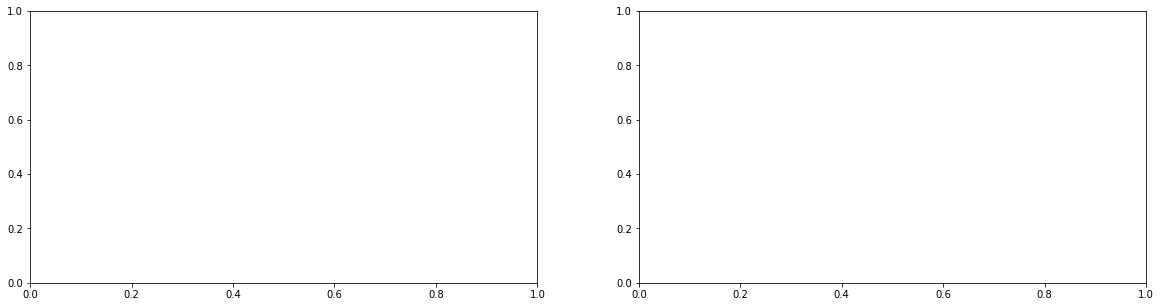

In [15]:
l = list(df1['stroke'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['No Stroke Suffered','Stroke Suffered'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Stroke Events (%)');

plt.subplot(1,2,2)
ax = sns.countplot('stroke',data = df1, palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Stroke Suffered','Stroke Suffered'])
plt.title('Number of Stroke Events');
plt.show()

- Clearly, the dataset is unbalanced in the favour of **no stroke**.
- **19 : 1** ratio is observed for **No Stroke : Stroke!**
- Thus, due to such heavy bias towards cases of **No Stroke**, predictions cannot be trusted!

### Discrete Features :

#### Distribution of Discrete Features :

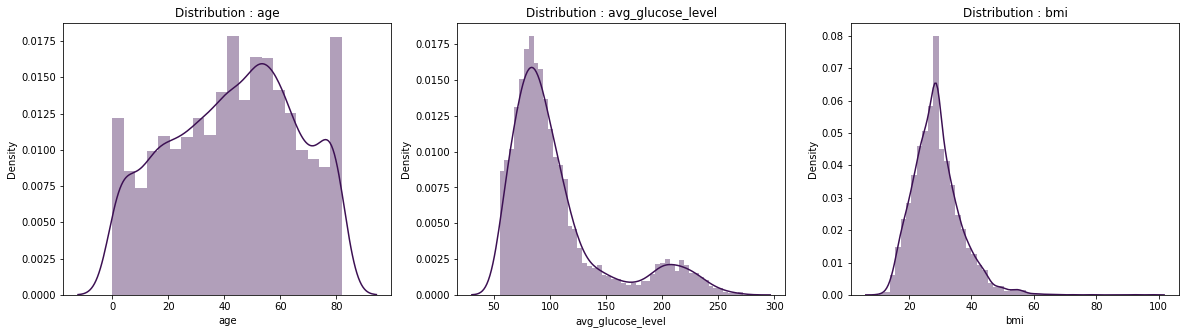

In [15]:
fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (20,5))
for i in range(len(discrete_features)):
    plt.subplot(1,3,i+1)
    sns.distplot(df1[discrete_features[i]],color = colors[0])
    title = 'Distribution : ' + discrete_features[i]
    plt.title(title)
plt.show()

- Data distribution for **age** has dominant values around : **10**, **60** & **80**.
- **avg_glucose_level** has 2 peaks of uneven heights present at values around : **100** & **200**.
- **bmi** has a near about **normal distribution** but it has values in low numbers towards the right side! 

### Discrete Features w.r.t Target Variable (stroke) :

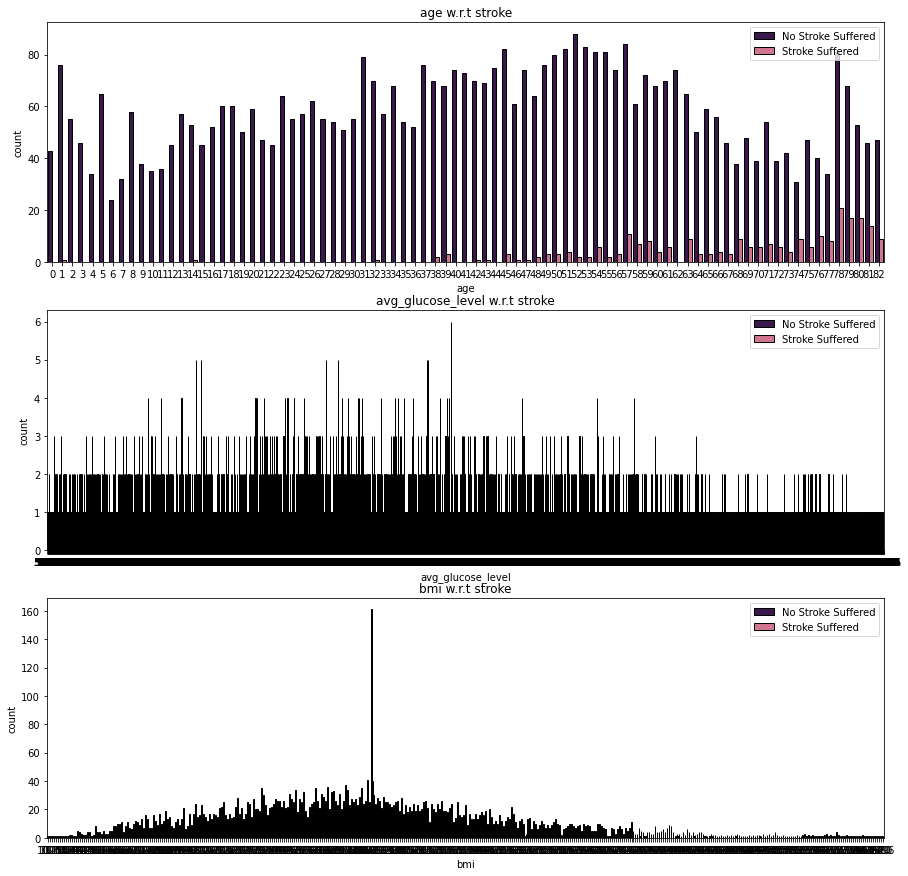

In [16]:
fig, ax = plt.subplots(nrows = 3,ncols = 1,figsize = (15,15))
for i in range(len(discrete_features)):
    plt.subplot(3,1,i+1)
    sns.countplot(discrete_features[i],data = df1,hue = "stroke",palette = colors,edgecolor = 'black')
    plt.legend(['No Stroke Suffered', 'Stroke Suffered'] ,loc = 'upper right')
    title = discrete_features[i] + ' w.r.t stroke'
    plt.title(title);

- Because of too many unique data points in the **discrete_features**, it is difficult to gain any type of insight. Thus, we will convert these features into categorical features for visualizations.
- We scale the data points of these features to a constant value that represents a range of values.(like mean)
- Here, we divide the data points by a constant value and assign it's quotient value as the representative constant. The scaling constants are decided by looking into the data & intuition. 

In [17]:
df1['age_group'] = [ int(i / 5) for i in df1['age']]
df1['avg_glucose_level_group'] = [ int(i / 20) for i in df1['avg_glucose_level']]
df1['bmi_group'] = [ int(i / 5) for i in df1['bmi']]

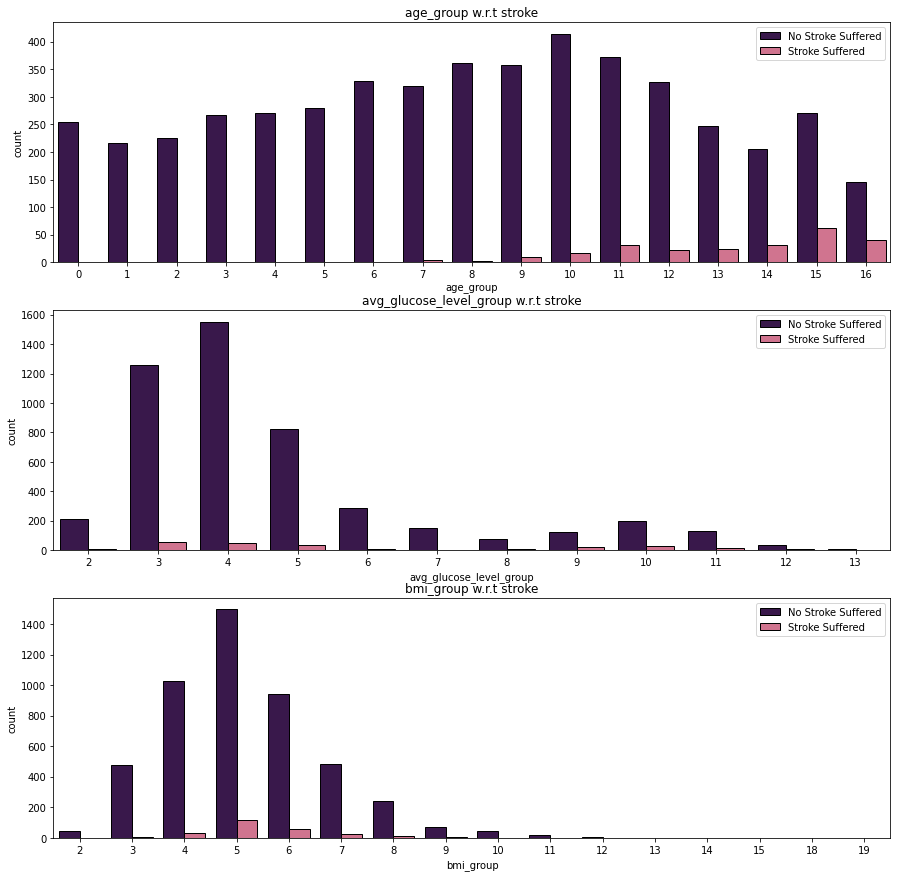

In [18]:
fig, ax = plt.subplots(nrows = 3,ncols = 1,figsize = (15,15))
group_numerical_features = [i + '_group' for i in ['age','avg_glucose_level','bmi']]

for i in range(len(group_numerical_features)):
    plt.subplot(3,1,i+1)
    sns.countplot(group_numerical_features[i],data = df1,hue = "stroke",palette = colors,edgecolor = 'black')
    plt.legend(['No Stroke Suffered', 'Stroke Suffered'] ,loc = 'upper right')
    title = group_numerical_features[i] + ' w.r.t stroke'
    plt.title(title);

- For **age**, cases of **stroke suffered** can be observed for the values between **35**(7x5) - **80**(16x5). It is not a dominant patch due to the imbalance nature of the dataset.  
- For **avg_glucose_level**, 2 groups can be found : **60**(3x20) - **100**(5x20) & **180**(9x20) - **220**(11x20). Patients with **avg_glucose_level** present in the 1st group are more prone to suffering **stroke** than group 2.
- **bmi** values from **15**(3x5) - **40**(8x5) have displayed more cases of **stroke**.

### Categorical Features :

#### Distribution of Categorical Features :

In [19]:
categorical_features.remove('stroke')

- We remove the **stroke** feature from the list of categorical features as it is the target variable and we will treat it separately!

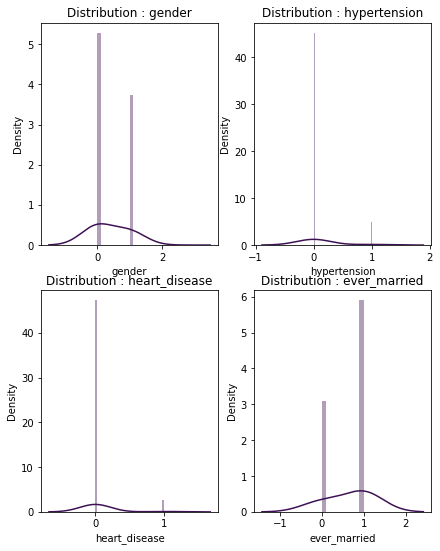

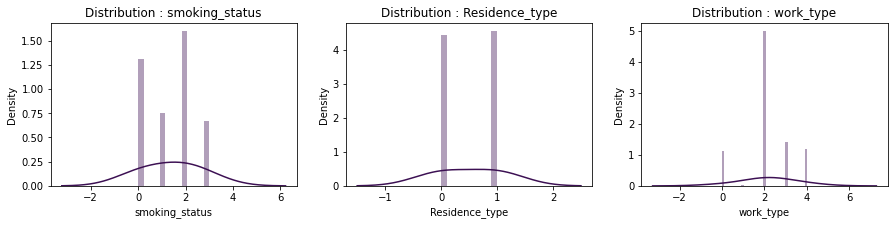

In [20]:
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (7,9))
for i in range(len(categorical_features[:4])):
    plt.subplot(2,2,i+1)
    sns.distplot(df1[categorical_features[i]],kde_kws = {'bw' : 1},color = colors[0]);
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)
    
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,3))
for i in range(-1,-4,-1):
    plt.subplot(1,3,-i)
    sns.distplot(df1[categorical_features[i]],kde_kws = {'bw' : 1},color = colors[0]);
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)

- All the categorical features are **Normally Distributed**.

### Categorical Features w.r.t Target Variable (stroke) :

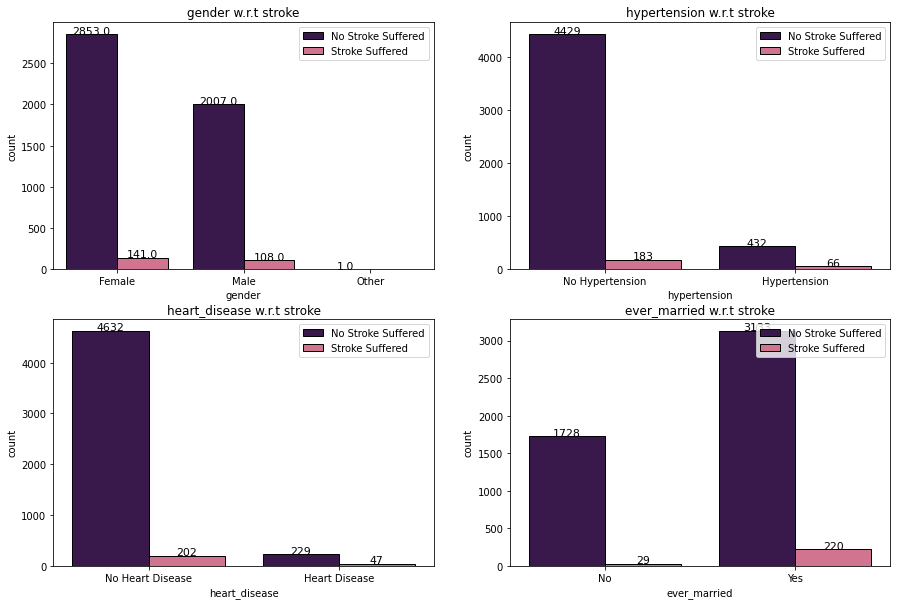

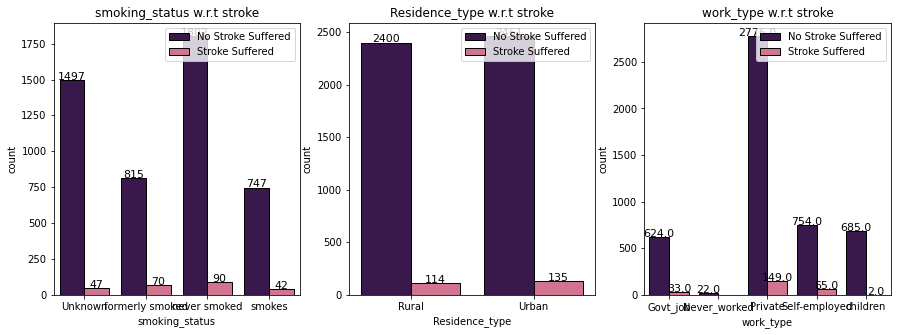

In [21]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(categorical_features[i],data = df1,hue = "stroke",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    ax.set_xticklabels([tf1[categorical_features[i]][j] for j in sorted(df1[categorical_features[i]].unique())])
    plt.legend(['No Stroke Suffered', 'Stroke Suffered'], loc = 'upper right')
    title = categorical_features[i] + ' w.r.t stroke'
    plt.title(title);

fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(-1,-4,-1):
    plt.subplot(1,3,-i)
    ax = sns.countplot(categorical_features[i],data = df1,hue = "stroke",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    ax.set_xticklabels([tf1[categorical_features[i]][j] for j in sorted(df1[categorical_features[i]].unique())])
    plt.legend(['No Stroke Suffered', 'Stroke Suffered'], loc = 'upper right')
    title = categorical_features[i] + ' w.r.t stroke'
    plt.title(title);

- All the graphs near about share the same pattern i.e displaying low number of **stroke** cases and no clear cut reason to point towards.  
- **Female** population has recorded more cases of **stroke** than **male**.
- Interestingly, people with **no hypertension** & **no heart disease** have displayed to be more prone to **suffering stroke** than people that have these medical conditions.
- According to the dataset, people that have been **married** have **suffered stroke** more than those people who have never married.
- When it comes to **smoking_status**, people that have **never smoked** have topped the numbers with **formerly smoked** people coming at the 2nd position to record **stroke** cases.
- Not much info can be gained from **Residence_type** & **work_type**, however **Private** workers **suffered stroke** cases more than any other worker.

### Categorical Features w.r.t Positive Cases of stroke :

In [22]:
gender = df1[df1['stroke'] == 1]['gender'].value_counts()
gender = [gender[0] / sum(gender) * 100, gender[1] / sum(gender) * 100]

hypertension = df1[df1['stroke'] == 1]['hypertension'].value_counts()
hypertension = [hypertension[0] / sum(hypertension) * 100, hypertension[1] / sum(hypertension) * 100]

heart_disease = df1[df1['stroke'] == 1]['heart_disease'].value_counts()
heart_disease = [heart_disease[0] / sum(heart_disease) * 100, heart_disease[1] / sum(heart_disease) * 100]

ever_married = df1[df1['stroke'] == 1]['ever_married'].value_counts()
ever_married = [ever_married[0] / sum(ever_married) * 100, ever_married[1] / sum(ever_married) * 100]

work_type = df1[df1['stroke'] == 1]['work_type'].value_counts()
work_type = [work_type[0] / sum(work_type) * 100, work_type[2] / sum(work_type) * 100,
             work_type[3] / sum(work_type) * 100, work_type[4] / sum(work_type) * 100,]

Residence_type = df1[df1['stroke'] == 1]['Residence_type'].value_counts()
Residence_type = [Residence_type[0] / sum(Residence_type) * 100, Residence_type[1] / sum(Residence_type) * 100]

smoking_status = df1[df1['stroke'] == 1]['smoking_status'].value_counts()
smoking_status = [smoking_status[0] / sum(smoking_status) * 100, smoking_status[1] / sum(smoking_status) * 100,
                  smoking_status[2] / sum(smoking_status) * 100, smoking_status[3] / sum(smoking_status) * 100]

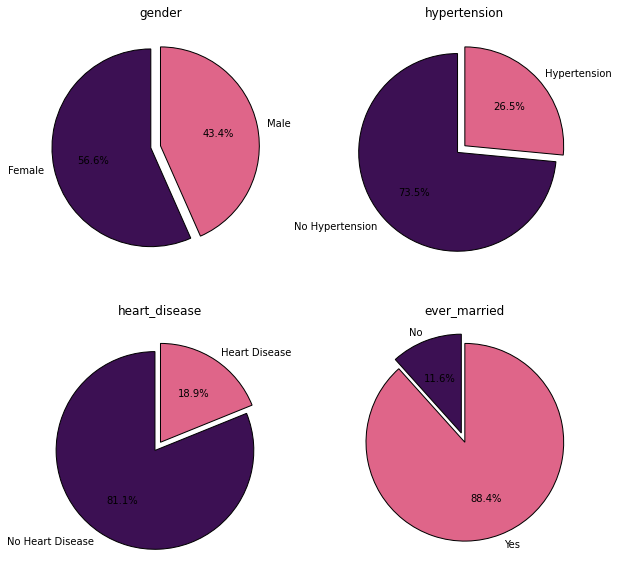

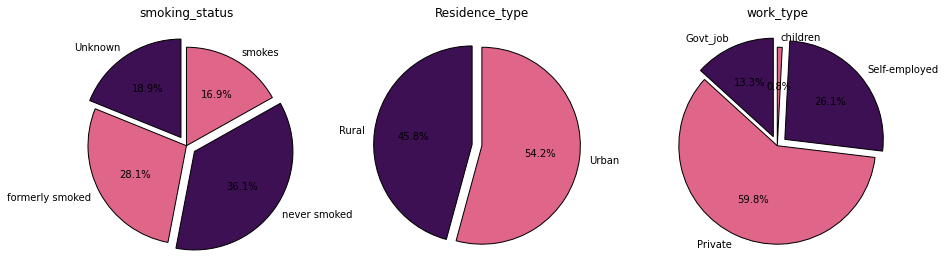

In [23]:
l1 = [gender, hypertension, heart_disease, ever_married, work_type, Residence_type, smoking_status]

ax,fig = plt.subplots(nrows = 2,ncols = 2,figsize = (10,10))
for i in range(4):
    if len(l1[i]) == 2:
        plt.subplot(2,2,i + 1)
        plt.pie(l1[i],labels = [tf1[categorical_features[i]][j] for j in sorted(df1[df1['stroke'] == 1][categorical_features[i]].unique())],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
               wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
        plt.title(categorical_features[i]);
    else:
        plt.subplot(2,2,i + 1)
        plt.pie(l1[i],labels = [tf1[categorical_features[i]][j] for j in sorted(df1[df1['stroke'] == 1][categorical_features[i]].unique())],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1,0),colors = colors,
               wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
        plt.title(categorical_features[i]);

ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,15))
for i in range(-1,-4,-1):
    if len(l1[i]) == 2:
        plt.subplot(1,3,-i)
        plt.pie(l1[i],labels = [tf1[categorical_features[i]][j] for j in sorted(df1[df1['stroke'] == 1][categorical_features[i]].unique())],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
               wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
        plt.title(categorical_features[i]);
    else:
        plt.subplot(1,3,-i)
        plt.pie(l1[i],labels = [tf1[categorical_features[i]][j] for j in sorted(df1[df1['stroke'] == 1][categorical_features[i]].unique())],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1,0),colors = colors,
               wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
        plt.title(categorical_features[i]);

- According to the data, **female** population is more susceptible to **suffering stroke**.
- From the above visuals, surprisingly, **stroke** cases were found more in patients that **did not have any medical conditions like heart_disease or hypertension**!
- People that have been **married** have the highest probability of suffering from **stroke**. 
- When it comes to **stroke & smoking_status**, people that have **never smoked** are most susceptible. They are followed by **formerly smoked**. Surprisingly, people that **smokes** have the lowest chances of **suffering from stroke**.
- People living in **Urban Residence Type** have edged the people living in **Rural Residence Type** in terms of **stroke** cases.
- When it comes to **work_type**, people working in **Private** have recorded more than **50%+** of **stroke** cases. It is followed by **Self-employed** & **Govt_job** that record half and quarter of the cases that **Private** recorderd respectively.

### Categorical features vs Discrete features w.r.t Target variable (stroke) :

#### gender vs Discrete Features :

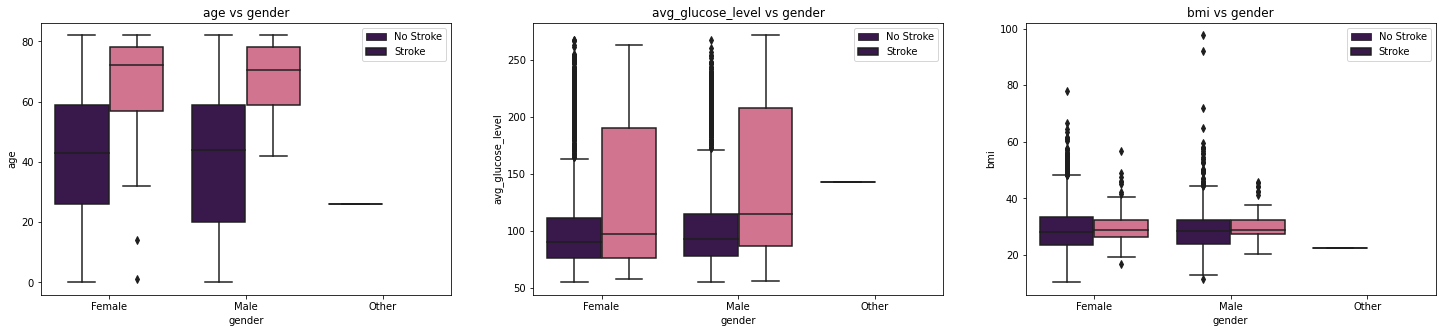

In [24]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,5))
for i in range(len(discrete_features)):
    plt.subplot(1,3,i+1)
    ax = sns.boxplot(x = 'gender',y = discrete_features[i],data = df1,hue = 'stroke',palette = colors);
    ax.set_xticklabels([tf1['gender'][j] for j in sorted(df1['gender'].unique())])
    title = discrete_features[i] + ' vs gender'
    plt.legend(['No Stroke','Stroke'], loc = 'upper right')
    plt.title(title);

- For both **male** & **female** population, **age** of those **suffering from stroke** is **60+**.
- For majority of the **avg_glucose_level** values, both **gender** have recorded significant cases of **stroke**.
- For **male** population, the lower limit of **bmi** values is slightly higher than the **female**. Overall, both the **gender** overlap the same **bmi** values for cases of **stroke**.

#### hypertension vs Discrete Features :

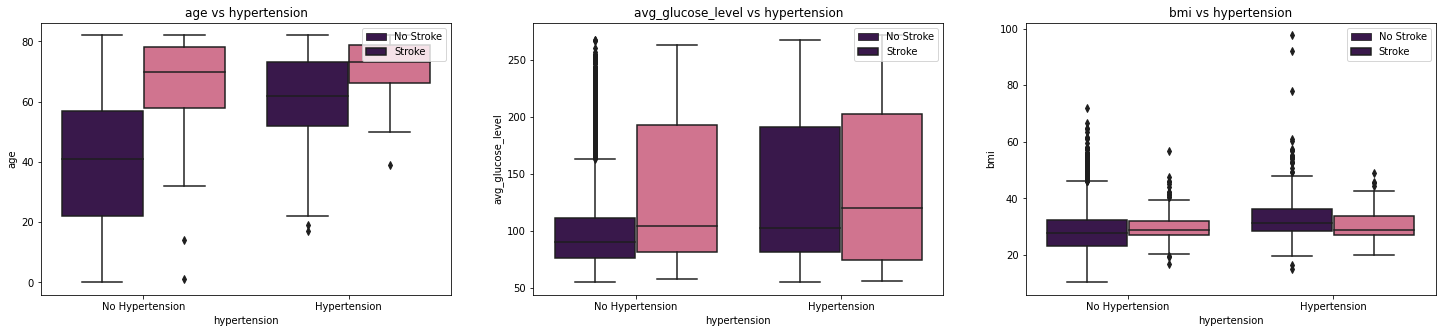

In [25]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,5))
for i in range(len(discrete_features)):
    plt.subplot(1,3,i+1)
    ax = sns.boxplot(x = 'hypertension',y = discrete_features[i],data = df1,hue = 'stroke',palette = colors);
    ax.set_xticklabels([tf1['hypertension'][j] for j in sorted(df1['hypertension'].unique())])
    title = discrete_features[i] + ' vs hypertension'
    plt.legend(['No Stroke','Stroke'], loc = 'upper right')
    plt.title(title);

- Wierdly, cases of **stroke** found in people having **hypertension** have a high lower limit of the **age 60+** than those who do not suffer from **hypertension**.
- When it comes to **hypertension & avg_glucose_level**, cases of **stroke** & **no stroke** near about share the same values.
- Due to **hypertension**, lower limits of **bmi** values are slightly reduced making people prone to **stroke**. 

#### heart_disease vs Discrete Features :

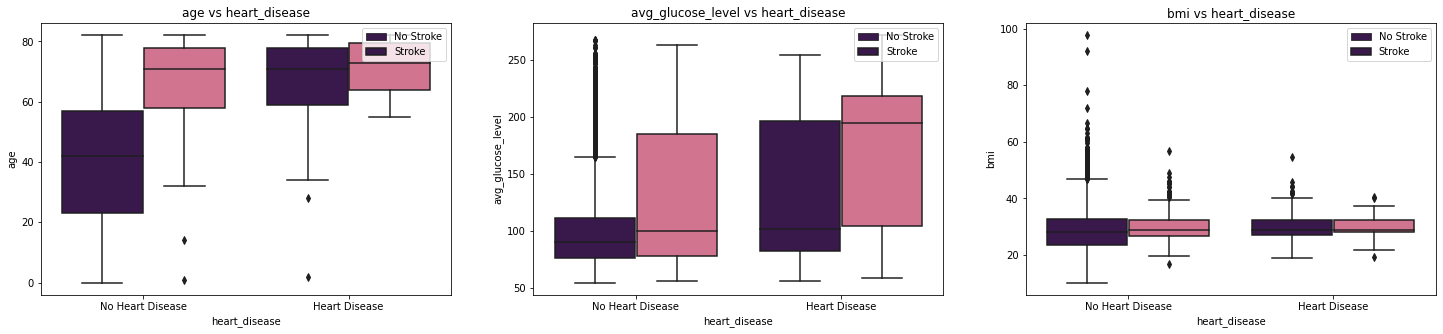

In [26]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,5))
for i in range(len(discrete_features)):
    plt.subplot(1,3,i+1)
    ax = sns.boxplot(x = 'heart_disease',y = discrete_features[i],data = df1,hue = 'stroke',palette = colors);
    ax.set_xticklabels([tf1['heart_disease'][j] for j in sorted(df1['heart_disease'].unique())])
    title = discrete_features[i] + ' vs heart_disease'
    plt.legend(['No Stroke','Stroke'], loc = 'upper right')
    plt.title(title);

- Graphs of **hypertension** & **heart_disease** against discrete features are very similar with slight differences.
- They share the same effects on **stroke**.

#### ever_married vs Discrete Features :

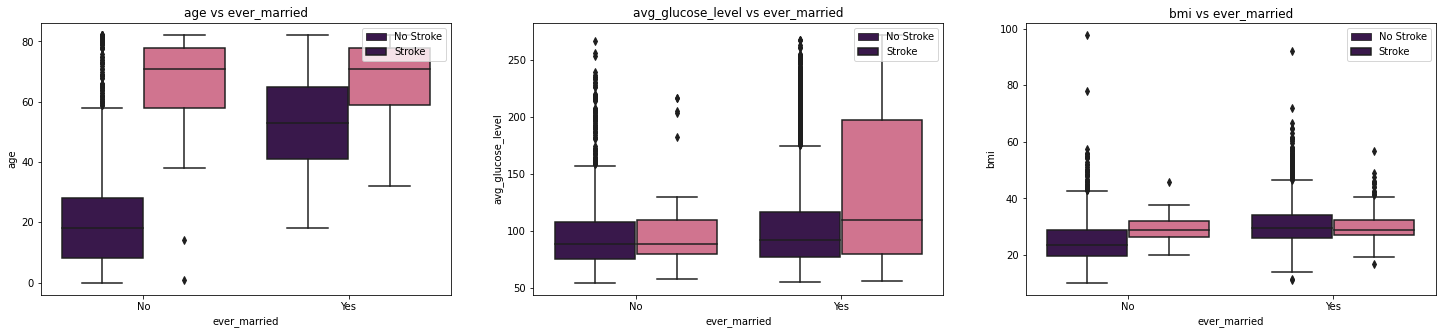

In [27]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,5))
for i in range(len(discrete_features)):
    plt.subplot(1,3,i+1)
    ax = sns.boxplot(x = 'ever_married',y = discrete_features[i],data = df1,hue = 'stroke',palette = colors);
    ax.set_xticklabels([tf1['ever_married'][j] for j in sorted(df1['ever_married'].unique())])
    title = discrete_features[i] + ' vs ever_married'
    plt.legend(['No Stroke','Stroke'], loc = 'upper right')
    plt.title(title);

- For **ever_married vs discrete features**, repeated insights can be found.
- People that have been **married** have displayed cases of **stroke** for near about all the values of **avg_glucose_level**.

#### work_type vs Discrete Features :

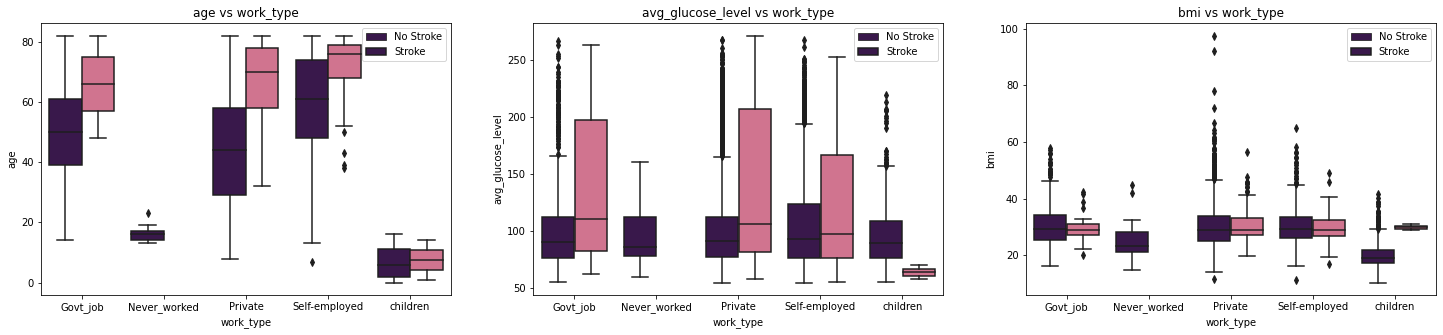

In [28]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,5))
for i in range(len(discrete_features)):
    plt.subplot(1,3,i+1)
    ax = sns.boxplot(x = 'work_type',y = discrete_features[i],data = df1,hue = 'stroke',palette = colors);
    ax.set_xticklabels([tf1['work_type'][j] for j in sorted(df1['work_type'].unique())])
    title = discrete_features[i] + ' vs work_type'
    plt.legend(['No Stroke','Stroke'], loc = 'upper right')
    plt.title(title);

- Irrespective of the **work_type**, **stroke** cases have been found for **age of 60+** except for **children**.
- Clearly, people that have worked to earn a living have suffered from **stroke**. 
- **Stroke** cases have been found more in people working in a job i.e **Govt_job** & **Private** than those who are **Self-employed**.

#### Residence_type vs Discrete Features :

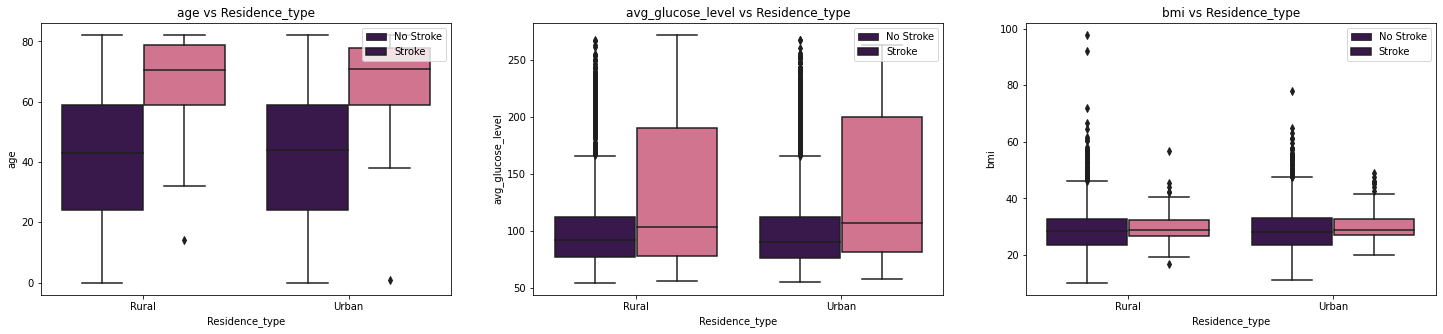

In [29]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,5))
for i in range(len(discrete_features)):
    plt.subplot(1,3,i+1)
    ax = sns.boxplot(x = 'Residence_type',y = discrete_features[i],data = df1,hue = 'stroke',palette = colors);
    ax.set_xticklabels([tf1['Residence_type'][j] for j in sorted(df1['Residence_type'].unique())])
    title = discrete_features[i] + ' vs Residence_type'
    plt.legend(['No Stroke','Stroke'], loc = 'upper right')
    plt.title(title);

- The graphs of **Rural Residence_type** & **Urban Residence_type** against discrete features w.r.t **stroke** are identical.
- They cannot be separated from each other. They repeat the insights that have been highlighted uptill now.

#### smoking_status vs Discrete Features :

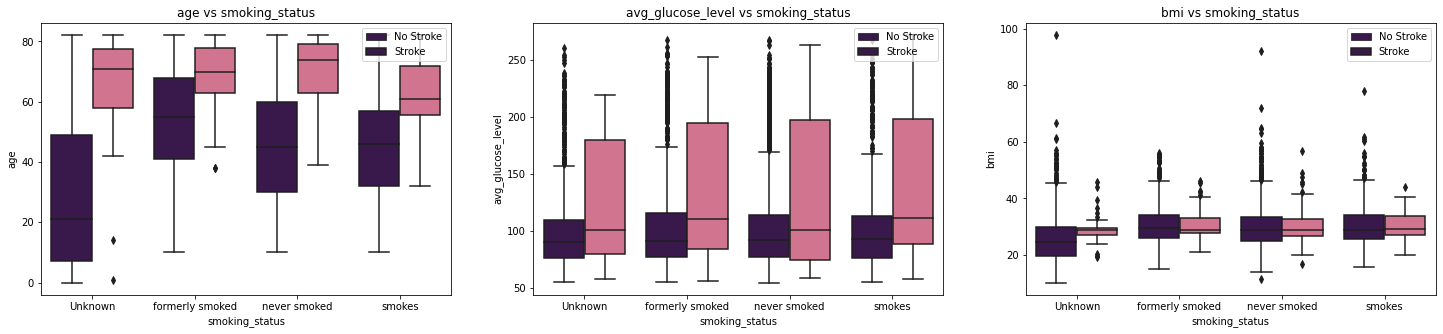

In [30]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,5))
for i in range(len(discrete_features)):
    plt.subplot(1,3,i+1)
    ax = sns.boxplot(x = 'smoking_status',y = discrete_features[i],data = df1,hue = 'stroke',palette = colors);
    ax.set_xticklabels([tf1['smoking_status'][j] for j in sorted(df1['smoking_status'].unique())])
    title = discrete_features[i] + ' vs smoking_status'
    plt.legend(['No Stroke','Stroke'], loc = 'upper right')
    plt.title(title);

- Irrespective of **smoking_status**, people **suffering from stroke** have been detected at **age around 60**.
- Similar to **age**, same values of **avg_glucose_level** have been found in **stroke** cases irrespective of **smoking_status**.
- However, because of the **smoking_status**, range of values for which cases of **stroke** differ. Range of values of people that **smokes** is slightly higher than everyone else.

### Discrete features vs Discrete features w.r.t Target variable (stroke) :

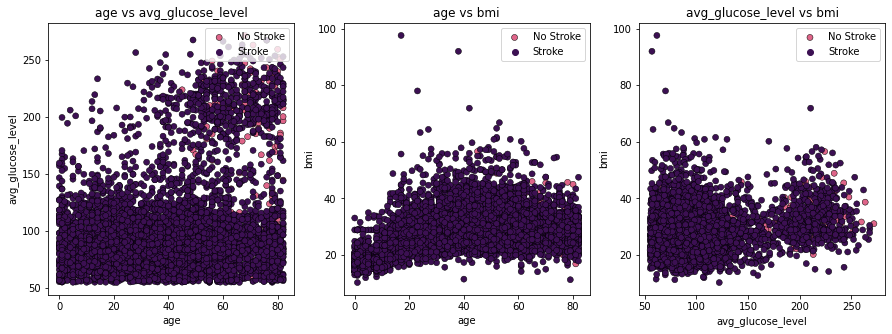

In [31]:
a = 0
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5),squeeze = False)
for i in range(len(discrete_features) - 1):
    for j in range(len(discrete_features)):
        if i != j and j > i:
            a += 1
            plt.subplot(1,3,a)
            sns.scatterplot(x = discrete_features[i],y = discrete_features[j],data = df1,hue = 'stroke',palette = colors,edgecolor = 'black');
            title = discrete_features[i] + ' vs ' + discrete_features[j]
            plt.legend(['No Stroke','Stroke'], loc = 'upper right',)
            plt.title(title)

- Due to the imbalance nature of the data, cases of **stroke** & **no stroke** cannot be separated.
- No insights can be interpreted from the above graphs.

# <center><div style="font-family: Times New Roman; border-radius : 10px; background-color: #3C1053; color: #DF6589; padding: 12px; line-height: 1;">Summary of EDA</div></center>

### Order / Values of features for positive cases of stroke :

- **Categorical Features (Order) :**
    
    - **gender** : female > male
    - **hypertension** : no hypertension > hypertension
    - **heart_disease** : no heart disease > heart disease
    - **ever_married** : married > no married
    - **working_type** : Private > Self-employed > Govt_job > children 
    - **Residence_type** : Urban > Rural
    - **smoking_status** : never smoked > formerly smoked > smokes


- **Discrete Features (Range) :**
    
    - **age** : 55 - 80 
    - **avg_glucose_level** : 80 - 200
    - **bmi** : 20 - 40


- **According to the data, these order / range of values leads to heart failures.**

# <center><div style="font-family: Times New Roman; border-radius : 10px; background-color: #3C1053; color: #DF6589; padding: 12px; line-height: 1;">Domain Information</div></center>

- **Categorical Features (Order) :**
    
    - **gender** : male > female
    - **hypertension** : hypertension > no hypertension
    - **heart_disease** : heart disease > no heart disease
    - **ever_married** : married = not married 
    - **working_type** : Stress of the work can lead to stroke.
    - **Residence_type** : Mortality due to stroke is higher in rural areas than urban areas due to poor medical treatment. 
    - **smoking_status** : Smoking increases the risk of stroke.


- **Discrete Features (Range) :**
    
    - **age** : The chance of having a stroke about doubles every 10 years after age 55. 
    - **avg_glucose_level** : High blood glucose is found in stroke cases. A value of 126+ has been observed alot. 
    - **bmi** : High bmi values increases the chances of ischemic stroke.


- All the information mentioned is gathered from websites and research papers. We will use this information for cross checking the summary of EDA and feature selection.


- Conclusions obtained from the EDA contradict the Domain Information for the features : **hypertension**, **heart_disease** and **smoking_status**.


- This difference is probably because of the **Unbalanced dataset**!


- Thus, we will carry out the feature engineering process, balance the dataset using **SMOTE analysis** and feed the balanced to the ML algorithms.

# <center><div style="font-family: Times New Roman; border-radius : 10px; background-color: #3C1053; color: #DF6589; padding: 12px; line-height: 1;">Feature Engineering</div></center>

- The dataset is **Unbalanced** with a bias towards **No Stroke** in a ratio of **19 : 1** for **No Stroke : Stroke**. We will first balance the dataset using **SMOTE Analysis**!

- In order to cope with unbalanced data, there are 2 options :

    - **Undersampling** : Trim down the majority samples of the target variable.
    - **Oversampling** : Increase the minority samples of the target variable to the majority samples.
    
- For best performances, combination of undersampling and oversampling is recommended.
- First, we will undersample the majority samples and it is followed by oversampling minority samples.
- For data balancing, we will use **imblearn**.
- **PIP statement** : pip install imbalanced-learn

### Data Balancing using SMOTE :

In [32]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [33]:
over = SMOTE(sampling_strategy = 1)
under = RandomUnderSampler(sampling_strategy = 0.1)
f1 = df1.loc[:,:'smoking_status']
t1 = df1.loc[:,'stroke']

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
f1, t1 = pipeline.fit_resample(f1, t1)
Counter(t1)

Counter({0: 2490, 1: 2490})

### Calculation for Data Balancing :

- **Sampling Strategy** : It is a ratio which is the common paramter for oversampling and undersampling.
- **Sampling Strategy** : **( Samples of Minority Class ) / ( Samples of Majority Class )**


- In this case,

    - **Majority Class : No Stroke** : 4861 samples
    - **Minority Class : Stroke** : 249 samples


### Undersampling : Trim down the majority class samples

- Sampling_Strategy = 0.1
- 0.1 = ( 249 ) / Majority Class Samples
- After undersampling, 

    - **Majority Class : No Stroke** : 2490 samples
    - **Minority Class : Stroke** : 249 samples


### Oversampling : Increase the minority class samples

- Sampling_Strategy = 1
- 1 = ( Minority Class Samples ) / 2490
- After oversampling, 

    - **Majority Class : No Stroke** : 2490 samples
    - **Minority Class : Stroke** : 2490 samples
    

- Final Class Samples :

    - **Majority Class : No Stroke** : 2490 samples
    - **Minority Class : Stroke** : 2490 samples


- Here, we balance the data by reducing the majority group samples & then increasing the minority group to majority group. 
- For imbalanced datasets, we **duplicate the data** to deal with the potential bias in the predictions. 
- Due to this duplication process, we are using **synthetic data** for modeling purposes to ensure that the predictions are not skewed towards the majority target class value.
- Thus, evaluating models using **accuracy** will be misleading. Instead, we will go for **confusion matrix, ROC-AUC graph and ROC-AUC score** for model evaluation.

### Data Leakage : 

- **Data Leakage** is the problem when the information outside the training data is used for model creation. It is one of the most ignored problem.
- In order to create robust models, solving data leakage is a must! Creation of overly optimistic models which are practically useless & cannot be used in production have become common.
- Model performance degrades when **Data Leakage** is not dealt with & the model is sent online. It is a difficult concept to understand because it seems quite trivial.
- Typical approach used is transforming / modifying the entire dataset by filling NAN values with mean, median & mode, standardisation, normalization, etc.
- When we execute the above process in order to make the dataset ready for modeling, we use the values from the entire dataset & thus indirectly provide information from the **to-be test data** i.e outside of the training data.
- Thus, in order to avoid **Data Leakage**, it is advised to use **train-test-split** before any transformations. Execute the transformations according to the training data for the training as well as test data. Use of k-fold cross validation is also suggested!
- We will display the effect of **Data Leakage** from the following code snippet!

In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size = 0.15, random_state = 2)

### Correlation Matrix :

In [35]:
x_train_test = x_train.copy(deep = True)
x_train_test['stroke'] = y_train

- In order to visualize the correlation matrix, we create a new dataframe that contains values from **x_train** & **y_train**.
- Thus, we reject anything outside the training data to avoid data leakage.

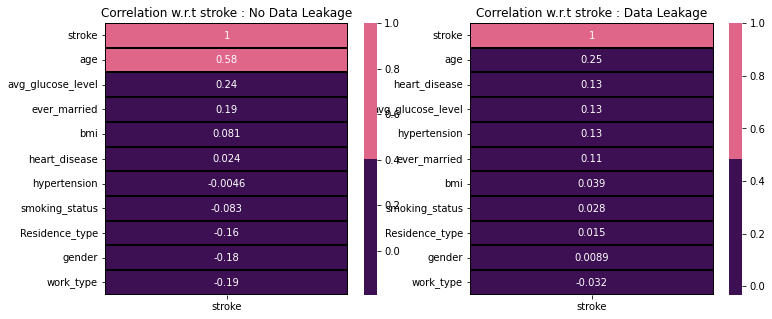

In [36]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))

plt.subplot(1,2,1)
corr = x_train_test.corrwith(x_train_test['stroke']).sort_values(ascending = False).to_frame()
corr.columns = ['stroke']
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t stroke : No Data Leakage');

plt.subplot(1,2,2)
corr = df1.drop(columns = ['age_group', 'avg_glucose_level_group', 'bmi_group']).corrwith(df1['stroke']).sort_values(ascending = False).to_frame()
corr.columns = ['stroke']
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t stroke : Data Leakage');

- Clearly, we can see the difference in values between **Data Leakage** & **No Data Leakage**.
- In the case of **No Data Leakage**, **age** displays a strong positive correlation with **stroke**. **avg_glucose_level** & **ever_married** display some kind of positive correlation. Opposite to positive correlation, **gender**, **Residence_type** & **work_type** have negative correlation with the **stroke**.
- In the case of **Data Leakage**, none of the features display an extreme positive or negative correlation with **stroke**.
- **age**, **heart_disease**, **avg_glucose_level**, **hypertension** & **ever_married** display some kind of positive correlation. Overall, all the features have a value very close to 0, displaying neutral correlation with **stroke**.

### Feature Selection for Categorical Features :

In [37]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif,chi2

#### Mutual Information Test :

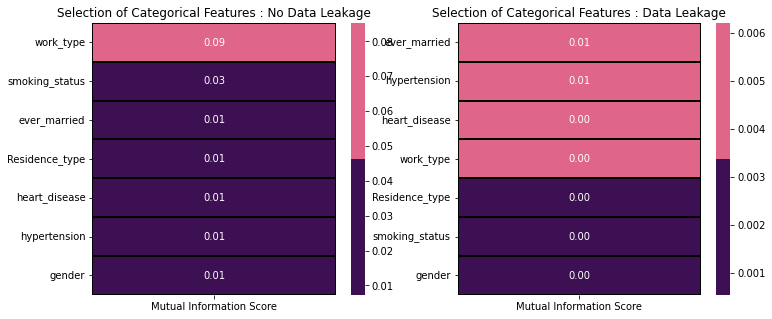

In [38]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))

plt.subplot(1,2,1)
features = x_train.loc[:,categorical_features]
target = pd.DataFrame(y_train)

best_features = SelectKBest(score_func = mutual_info_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Mutual Information Score']) 
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Mutual Information Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features : No Data Leakage');

plt.subplot(1,2,2)
features = df1.loc[:,categorical_features]
target = df1.loc[:,'stroke']

best_features = SelectKBest(score_func = mutual_info_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Mutual Information Score']) 
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Mutual Information Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features : Data Leakage');

- Mutual Information Score of **stroke** with categorical features display very low scores irrespective of **Data Leakage** or **No Data Leakage**.
- According to the above scores, none of the features should be selected for modeling.

#### Chi Squared Test :

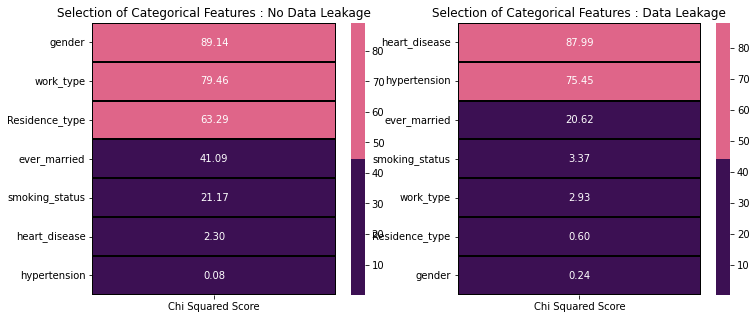

In [39]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))

plt.subplot(1,2,1)
features = x_train.loc[:,categorical_features]
target = y_train

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features : No Data Leakage');

plt.subplot(1,2,2)
features = df1.loc[:,categorical_features]
target = df1.loc[:,'stroke']

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features : Data Leakage');

- For **No Data Leakage**, we should reject the features that have low values. We will reject features with scores less than 20. Hence, we will not use : **smoking_status**, **heart_disease** & **hypertension**. This does contradict with the **Domain Information**.
- For **Data Leakage**, **heart disease** & **hypertension** need to be selected for modeling and reject the other features due to low Chi Squared Score. 

### Feature Selection for Numerical Features :

#### ANOVA Test :

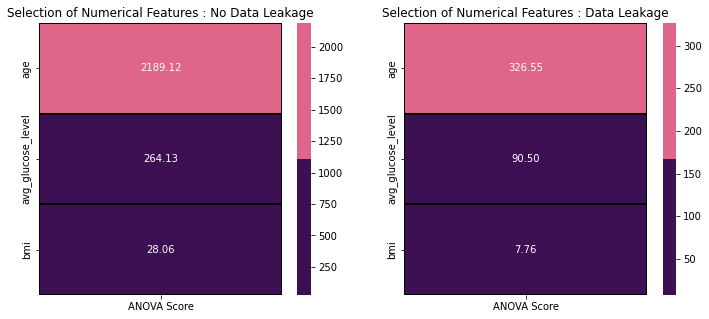

In [40]:
from sklearn.feature_selection import f_classif

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))

plt.subplot(1,2,1)
features = x_train.loc[:,discrete_features]
target = y_train

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features : No Data Leakage');

plt.subplot(1,2,2)
features = df1.loc[:,discrete_features]
target = df1.loc[:, 'stroke']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features : Data Leakage');

- From the above ANOVA Scores, we ignore the features with values less than 20. Hence, we reject **bmi** for modeling irrespective of **Data Leakage** or **No Data Leakage**.
- We ready the datasets for data scaling by dropping the features based on the above statistical tests.
- We will ignore the **Domain Information**!

In [41]:
# Feature Selection for No Data Leakage :
x_train = x_train.drop(columns = ['smoking_status', 'heart_disease', 'hypertension', 'bmi'])
x_test = x_test.drop(columns = ['smoking_status', 'heart_disease', 'hypertension', 'bmi'])

# Feature Selection for Data Leakage :
df2 = df1.drop(columns = ['smoking_status', 'work_type', 'Residence_type', 'gender', 
                          'bmi', 'age_group', 'avg_glucose_level_group', 'bmi_group']).copy(deep = True)

### Data Scaling :

In [42]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

# No Data Leakage :

# Normalization
x_train['age'] = mms.fit_transform(x_train[['age']])
x_test['age'] = mms.transform(x_test[['age']])
x_train['avg_glucose_level'] = mms.fit_transform(x_train[['avg_glucose_level']])
x_test['avg_glucose_level'] = mms.transform(x_test[['avg_glucose_level']])

# Standardization
x_train['gender'] = ss.fit_transform(x_train[['gender']]); x_test['gender'] = ss.transform(x_test[['gender']])
x_train['ever_married'] = ss.fit_transform(x_train[['ever_married']]); x_test['ever_married'] = ss.transform(x_test[['ever_married']])
x_train['work_type'] = ss.fit_transform(x_train[['work_type']]); x_test['work_type'] = ss.transform(x_test[['work_type']])
x_train['Residence_type'] = ss.fit_transform(x_train[['Residence_type']]); x_test['Residence_type'] = ss.transform(x_test[['Residence_type']])

# Data Leakage :

# Normalization
df2['age'] = mms.fit_transform(df2[['age']])
df2['avg_glucose_level'] = mms.fit_transform(df2[['avg_glucose_level']])

# Standardization
df2['hypertension'] = mms.fit_transform(df2[['hypertension']])
df2['heart_disease'] = mms.fit_transform(df2[['heart_disease']])
df2['ever_married'] = mms.fit_transform(df2[['ever_married']])

- Machine learning model does not understand the units of the values of the features. It treats the input just as a simple number but does not understand the true meaning of that value. Thus, it becomes necessary to scale the data.

- We have 2 options for data scaling : 
    
    1) **Normalization** 
    
    2) **Standardization**. 


- As most of the algorithms assume the data to be normally (Gaussian) distributed, **Normalization** is done for features whose data does not display normal distribution and **standardization** is carried out for features that are normally distributed but the range of values is huge or small as compared to other features.

- From the above transformation, we fit the data on the training data and transform the test data from information based on the training data. If we check the formulas of the **Normalization** & **Standardization**, we use mean, standard deviation, min & max values.

- Thus if these above statistical parameters are calculated using the complete dataset, then we are sharing the values from the **to-be test data** and thus sharing this **to-be test data** with the training data and cause **Data Leakage**.

# <center><div style="font-family: Times New Roman; border-radius : 10px; background-color: #3C1053; color: #DF6589; padding: 12px; line-height: 1;">Modeling</div></center>

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [44]:
x_train1, x_test1, y_train1, y_test1 = x_train.values, x_test.values, y_train.values, y_test.values

x_train2, x_test2, y_train2, y_test2 = train_test_split(df2.drop(columns = 'stroke').values, df2['stroke'].values, test_size = 0.15, random_state = 2)

- Selecting the features from the above conducted tests and splitting the data into **85 - 15 train - test** groups.

In [45]:
def model(classifier,x_train,y_train,x_test,y_test):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    plot_roc_curve(classifier, x_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

### 1] XGBoostClassifier :

In [46]:
from xgboost import XGBClassifier

In [47]:
classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

#### Model for No Data Leakage :

Cross Validation Score :  91.45%
ROC_AUC Score :  83.03%


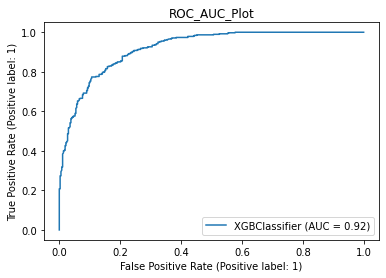

              precision    recall  f1-score   support

           0       0.87      0.77      0.82       367
           1       0.80      0.89      0.84       380

    accuracy                           0.83       747
   macro avg       0.84      0.83      0.83       747
weighted avg       0.83      0.83      0.83       747



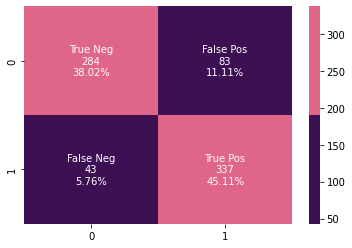

In [48]:
model(classifier_xgb,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_xgb,x_test1,y_test1)

#### Model for Data Leakage :

Cross Validation Score :  83.53%
ROC_AUC Score :  50.00%


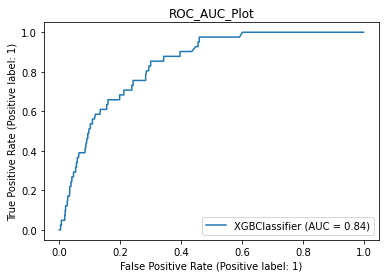

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       726
           1       0.00      0.00      0.00        41

    accuracy                           0.95       767
   macro avg       0.47      0.50      0.49       767
weighted avg       0.90      0.95      0.92       767



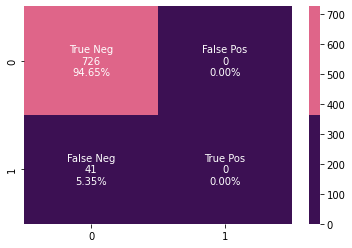

In [49]:
model(classifier_xgb,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_xgb,x_test2,y_test2)

### ML Alogrithm Results Table :

#### No Data Leakage Model : 

|Sr. No.|ML Algorithm|Cross Validation Score|ROC AUC Score|F1 Score (Stroke)|F1 Score (No Stroke)|
|-|-|-|-|-|-|
|1|XGB Classifier|91.45%|83.03%|84%|82%|

#### Data Leakage Model :


|Sr. No.|ML Algorithm|Cross Validation Score|ROC AUC Score|F1 Score (Stroke)|F1 Score (No Stroke)|
|-|-|-|-|-|-|
|1|XGB Classifier|83.53%|50%|0%|97%|

# <center><div style="font-family: Times New Roman; border-radius : 10px; background-color: #3C1053; color: #DF6589; padding: 12px; line-height: 1;">Conclusion</div></center>

- This is another good dataset for understanding how to handle binary classification problems however, imbalance nature of the dataset makes it a tricky task to deal with.


- It's EDA opportunities are immense as well. However, it's EDA insights did contradict with the domain knowledge. 


- In order to understand the significance of **Data Leakage** & it's effects, 2 models are created. You can easily spot the difference in statistical test values, feature selections and machine learning model performance. 


- F1 score of **No Data Leakage Model** suggests that it is more robust and can deal with the unknown data better than the **Data Leakage Model**.

### References :
- https://www.youtube.com/watch?v=n9jz7G68pVg
- https://machinelearningmastery.com/data-preparation-without-data-leakage/#:~:text=Data%20leakage%20refers%20to%20a,a%20marked%20effect%20on%20performance.
- https://stackoverflow.com/questions/49444262/normalize-data-before-or-after-split-of-training-and-testing-data
- [Image Source](https://www.cdc.gov/stroke/images/Index-About.jpg?_=67208)